### Regression

##### IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.stats import norm
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.linear_model import LinearRegression

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Data Reading

In [2]:
df=pd.read_csv(r"C:\Users\Admin\MLP\DATA\Data.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth',
       'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'weatherCode', 'pressure', 'cloudcover', 'tempF',
       'WindChillF', 'time', 'precipMM', 'DewPointF', 'humidity',
       'windspeedKmph', 'visibility', 'WindGustKmph', 'winddirDegree', 'date',
       'airport'],
      dtype='object')

In [4]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,FlightDate,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,...,time,precipMM,DewPointF,humidity,windspeedKmph,visibility,WindGustKmph,winddirDegree,date,airport
0,2016-01-01,1,2016,1,1,741.0,0.0,800,0.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA
1,2016-01-01,1,2016,1,1,759.0,1.0,800,35.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA
2,2016-01-01,1,2016,1,1,705.0,0.0,800,0.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA
3,2016-01-01,1,2016,1,1,754.0,0.0,800,0.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA
4,2016-01-01,1,2016,1,1,740.0,0.0,800,2.0,14747,...,800,0.0,23,65,7,10,8,108,2016-01-01,SEA


In [5]:
df.isnull().sum()

FlightDate         0
Quarter            0
Year               0
Month              0
DayofMonth         0
DepTime            0
DepDel15           0
CRSDepTime         0
DepDelayMinutes    0
OriginAirportID    0
DestAirportID      0
ArrTime            0
CRSArrTime         0
ArrDel15           0
ArrDelayMinutes    0
weatherCode        0
pressure           0
cloudcover         0
tempF              0
WindChillF         0
time               0
precipMM           0
DewPointF          0
humidity           0
windspeedKmph      0
visibility         0
WindGustKmph       0
winddirDegree      0
date               0
airport            0
dtype: int64

##### There is no missing values!

#### Feature Engineering

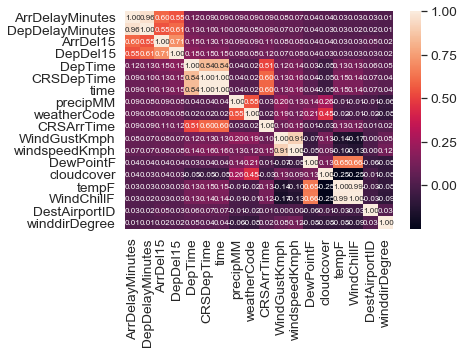

In [25]:
comat=df.corr()
k=18
col=comat.nlargest(k,'ArrDelayMinutes')['ArrDelayMinutes'].index
cm=np.corrcoef(df[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,annot=True, fmt='.2f', annot_kws={'size':8}, yticklabels=col.values, xticklabels=col.values)
plt.show()

In [7]:
features=['DepDelayMinutes','DepTime','CRSDepTime','precipMM','weatherCode','CRSArrTime','WindGustKmph','windspeedKmph','DewPointF','cloudcover','tempF','WindChillF']
prediction=['ArrDelayMinutes']

In [8]:
X=df[features].values
y=df[prediction].values

#### Train ,Test Split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

### Regressions:

#### 1.Linear Regression:

In [10]:
LR=LinearRegression()
reg=LR.fit(X_train,y_train)

In [11]:
p=LR.predict(X_test)

In [20]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(p,y_test))
print("MEAN SQUARE ERROR:",metrics.mean_squared_error(p,y_test))
print("R2_SCORE:",metrics.r2_score(y_test,p))

MEAN ABSOLUTE ERROR: 5.528545530777275
MEAN SQUARE ERROR: 117.45439093130125
R2_SCORE: 0.9323522133669964


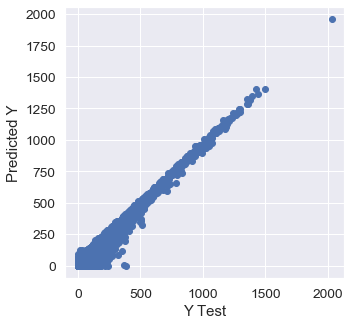

In [13]:
predictions = LR.predict(X_test)
predictions= predictions.reshape(-1,1)
plt.figure(figsize=(5,5))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### 2.Extra Tree Regressor:

In [14]:
from sklearn.ensemble import ExtraTreesRegressor

In [21]:
ETR=ExtraTreesRegressor()
reg1=ETR.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [22]:
p1=ETR.predict(X_test)

In [24]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(p1,y_test))
print("MEAN SQUARE ERROR:",metrics.mean_squared_error(p1,y_test))
print("R2_SCORE:",metrics.r2_score(p1,y_test))

MEAN ABSOLUTE ERROR: 5.932637861408527
MEAN SQUARE ERROR: 118.75026218846266
R2_SCORE: 0.9280040337078458


#### 3.XGBRegressor

In [15]:
import xgboost 
from xgboost import XGBRegressor
XGB=XGBRegressor()
reg2=XGB.fit(X_train,y_train)

In [16]:
pre=XGB.predict(X_test)

In [19]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(pre,y_test))
print("MEAN SQUARE ERROR:",metrics.mean_squared_error(pre,y_test))
print("r2_SCORE:",metrics.r2_score(y_test,pre))

MEAN ABSOLUTE ERROR: 5.640037705735595
MEAN SQUARE ERROR: 107.03379984340357
r2_SCORE: 0.9383539466092741


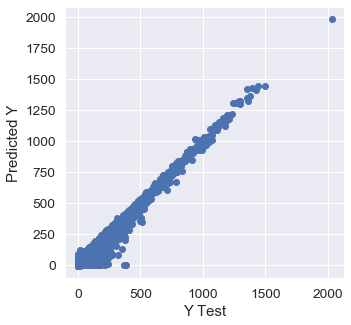

In [18]:
predictions = XGB.predict(X_test)
predictions= predictions.reshape(-1,1)
plt.figure(figsize=(5,5))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()